<a href="https://colab.research.google.com/github/robclarkv/QuantEconFin373HW/blob/main/Groupby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 1
Look closely at the output of the cells below.

How did pandas compute the sum of gbA? What happened to the NaN entries in column C?

Write your thoughts.

In [33]:
C = np.arange(1, 7, dtype=float)
C[[3, 5]] = np.nan
df = pd.DataFrame({
    "A" : [1, 1, 1, 2, 2, 2],
    "B" : [1, 1, 2, 2, 1, 1],
    "C": C,
})



gbA=df.groupby("A")

gbAB = df.groupby(["A", "B"])

df

gbA.get_group(1)

,A,B,C
0,1,1,1.0
1,1,1,2.0
2,1,2,3.0


In [20]:
gbA.sum()

,B,C
A,,
1,4,6.0
2,4,5.0


Pandas computed the sum of gbA by grouping A in the first 3 rows and the second 3 rows, and adding the values each group had in each row of B and C. They valued NaNs as 0s.

## Exercise 2
Use introspection (tab completion) to see what other aggregations are defined for GroupBy objects.

Pick three and evaluate them in the cells below.

Does the output of each of these commands have the same features as the output of gbA.sum() from above? If not, what is different?

In [24]:
# method 1
gbA.min()

,B,C
A,,
1,1,1.0
2,1,5.0


In [25]:
# method 2
gbA.mean()

,B,C
A,,
1,1.333333,2.0
2,1.333333,5.0


In [26]:
# method 3
gbA.median()

,B,C
A,,
1,1.0,2.0
2,1.0,5.0


No, of course they are still grouped by the 1s and 2s of column A, but if we use different methods, the values may change as it is different to take out the min number, the mean of all the numbers, or the median (which is actually the same as the min, just in a float).

## Exercise 3
Write a function that, given a DataFrame, computes each entry’s deviation from the mean of its column.

Apply the function to gbA.

With your neighbor describe what the index and and columns are? Where are the group keys (the A column)?

Determine the correct way to add these results back into df as new columns.

In [36]:
# write function here
def deviation_from_mean(df):
    return df.sub(df.mean())


# apply function here
gbA_deviation = gbA.transform(deviation_from_mean)

In [42]:
# add output of function as new columns to df here...
df = df.merge(gbA_deviation, left_on='A', right_index=True, suffixes=('', '_deviation'))
df

,A,B,C,B_deviation,C_deviation,B_deviation,C_deviation,B_deviation,C_deviation,B_dev,C_dev,B_dev,C_dev
0,1,1,1.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0
1,1,1,2.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0
2,1,2,3.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0,-0.333333,0.0
3,2,2,NaN,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0
4,2,1,5.0,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0
5,2,1,NaN,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0,0.666667,1.0


## Exercise 4
Think about what is shown in the the plots above.

Answer questions like:

Which type of delay was the most common?

Which one caused the largest average delay?

Does that vary by airline?

Write your thoughts.

Late Aircraft delay was the most common, as it also was the one that caused the largest average delay. The average delay time did vary by airline as we can see in the plots.

## Exercise 5
Verify that we wrote the functions properly by setting the arguments to appropriate values to replicate the plots from above.



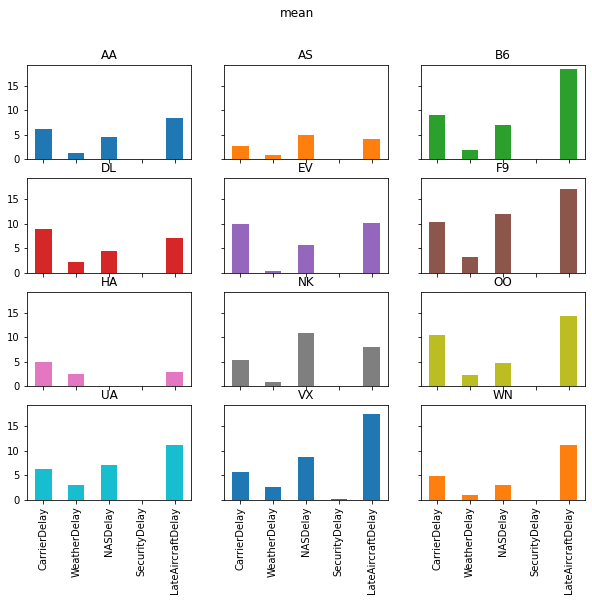

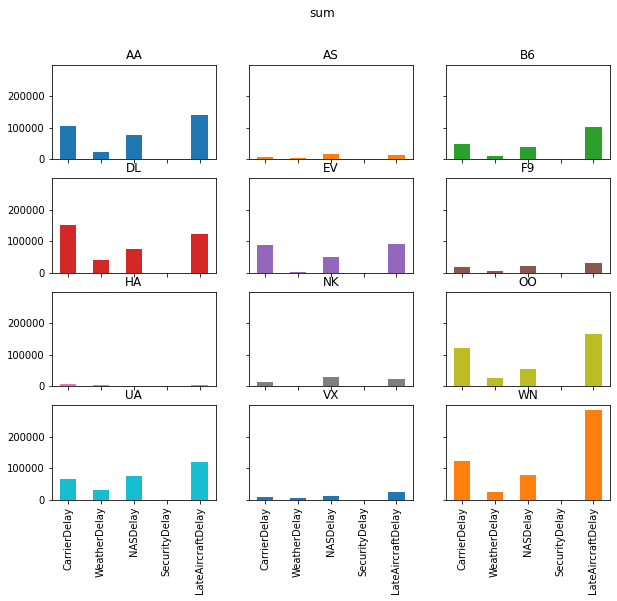

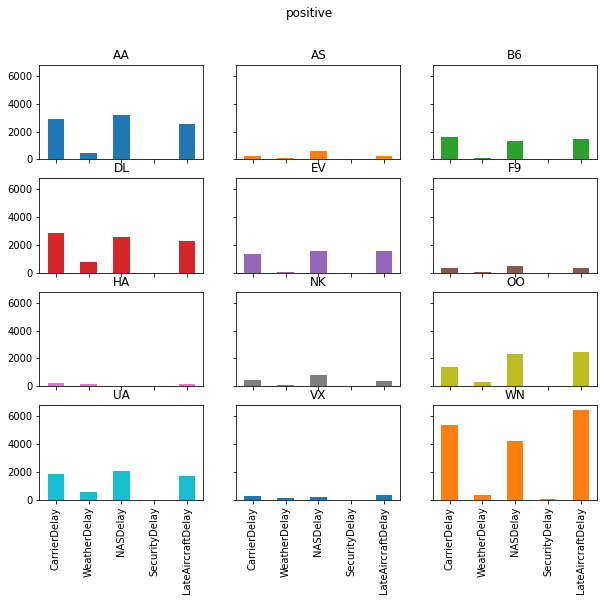

In [59]:
delay_cols = [
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay'
]
def mean_delay_plot(df, freq, figsize=(10, 8)):
    """
    Make a bar chart of average flight delays for each carrier at
    a given frequency.
    """
    mean_delays = (
        df
        .groupby([pd.Grouper(key="Date", freq=freq), "Carrier"])
        ["ArrDelay"]               # extract one column
        .mean()                    # take average
        .unstack(level="Carrier")  # Flip carrier up as column names
    )

    # plot
    axs = mean_delays.plot.bar(
        figsize=figsize, subplots=True, legend=False, sharex=True,
        sharey=True, layout=(4, 3), grid=False
    )

    # tweak spacing between subplots and x-axis labels
    axs[0, 0].get_figure().tight_layout()
    for ax in axs[-1, :]:
        ax.set_xticklabels(mean_delays.index.strftime("%a, %b. %d'"))

    # return the axes in case we want to further tweak the plot outside the function
    return axs


def delay_type_plot(df, start, end):
    """
    Make bar charts for total minutes, average minutes, and number of
    occurrences for each delay type, for all flights that were scheduled
    between `start` date and `end` date
    """
    sub_df = df.loc[
        (df["Date"] >= start) & (df["Date"] <= end)
    ]

    def positive(df):
        return (df > 0).sum()

    aggs = sub_df.groupby("Carrier")[delay_cols].agg(["sum", "mean", positive])

    reshaped = aggs.stack().T.swaplevel(axis=1).sort_index(axis=1)

    for agg in ["mean", "sum", "positive"]:
        axs = reshaped[agg].plot(
            kind="bar", subplots=True, layout=(4, 3), figsize=(10, 8), legend=False,
            sharex=True, sharey=True
        )
        fig = axs[0, 0].get_figure()
        fig.suptitle(agg)
#         fig.tight_layout();
url = "https://datascience.quantecon.org/assets/data/airline_performance_dec16.csv.zip"
air_dec = pd.read_csv(url, parse_dates = ['Date'])
# both days
delay_type_plot(air_dec, "12-12-16", "12-18-16")
